In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(seed=42)
mean = [0,0,0]
D = 16
cov = ((D ** 2) / 2) * np.array([[1,0,0],[0,0.5,0],[0,0,1]])

N = 100000
H_11, H_12, H_22 = rng.multivariate_normal(mean, cov, N).T

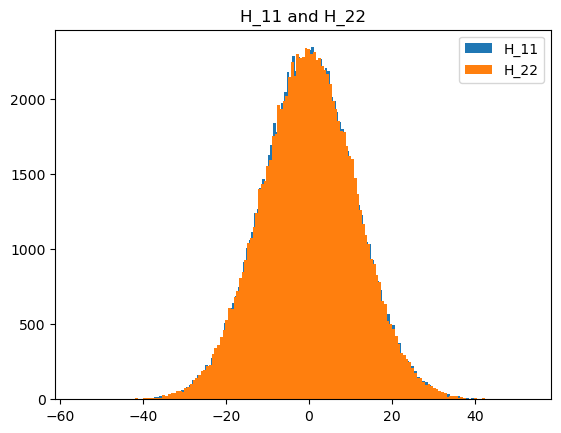

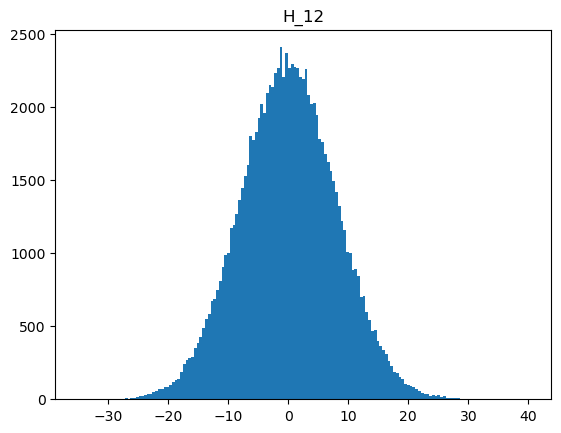

<Figure size 640x480 with 0 Axes>

In [ ]:
# H_11 and H_22
plt.hist(H_11, label="H_11", bins='fd')
plt.title("H_11 and H_22")
plt.hist(H_22, label="H_22", bins='fd')
plt.legend()
plt.show()
plt.clf()

# H_12
plt.hist(H_12, label="H_12", bins='fd')
plt.title("H_12")
plt.show()
plt.clf()

In [ ]:
make_m = lambda A, B, C: np.array([[A,B],[B,C]])

ensemble = []
for i in range(N):
    randm = make_m(H_11[i], H_12[i], H_22[i])
    ensemble.append(randm)

In [ ]:
gaps = []
for randm in ensemble:
    Es, _ = np.linalg.eig(randm)
    E1, E2 = Es
    gaps.append(np.abs(E1-E2))

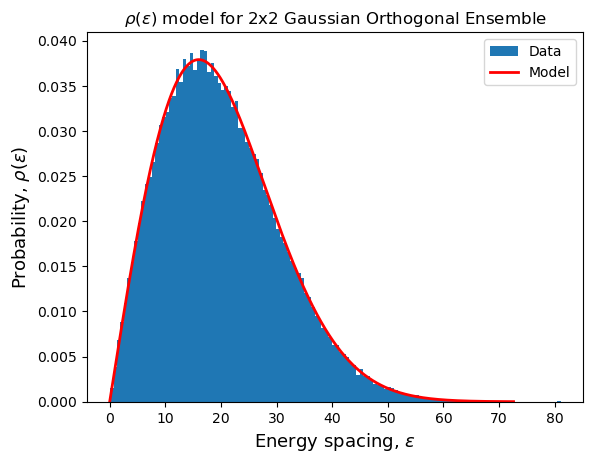

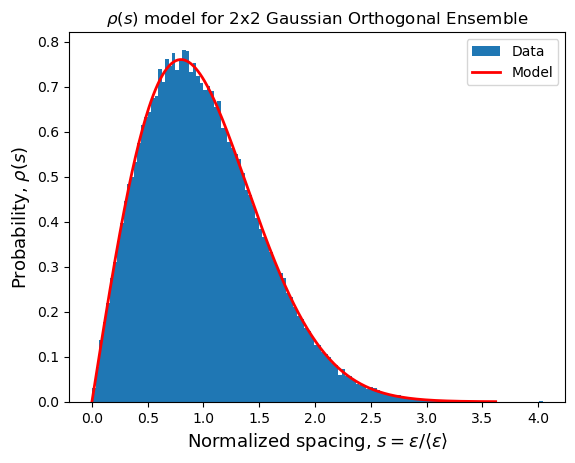

<Figure size 640x480 with 0 Axes>

In [ ]:
# statistics
mean_gap = np.mean(gaps)
std_gap = np.std(gaps)
std_s = np.std

# models
norm_model = lambda x: (np.pi * x / 2) * np.exp(-np.pi * x ** 2 / 4)
unnorm_model = lambda x: (x / D ** 2) * np.exp(- (1 / (2 * D ** 2)) * x ** 2)

# Level statistics for un-normalized model p(epsilon)
plt.hist(gaps, bins='fd', density=True, zorder=1, label="Data") # histogram
xs = np.arange(0, mean_gap + 5*std_gap, 0.01)
plt.plot(xs, unnorm_model(xs), zorder=2, color='red', linewidth=2, label="Model")
plt.xlabel(r"Energy spacing, $\epsilon$", fontsize=13)
plt.ylabel(r"Probability, $\rho(\epsilon)$", fontsize=13)
plt.title(r"$\rho(\epsilon)$ model for 2x2 Gaussian Orthogonal Ensemble")
plt.legend()
plt.show()
plt.clf()

# Level statistics for normalized model p(s)
plt.hist(gaps / mean_gap, bins='fd', density=True, zorder=1, label="Data") # normalized histogram
xs = np.arange(0, 1 + 5 * std_gap / mean_gap, 0.01) 
plt.plot(xs, norm_model(xs), zorder=2, color='red', linewidth=2, label="Model")
plt.xlabel(r"Normalized spacing, $s = \epsilon/\left<\epsilon\right>$", fontsize=13)
plt.ylabel(r"Probability, $\rho(s)$", fontsize=13)
plt.title(r"$\rho(s)$ model for 2x2 Gaussian Orthogonal Ensemble")
plt.legend()
plt.show()
plt.clf()

The expected energy gap is given by:

$$\newcommand\diff{\mathop{}\!\mathrm{d}} \left<\epsilon\right> = \int_{0}^{\infty}\epsilon\rho(\epsilon)\diff{\epsilon} = \sqrt{\frac{\pi}{2}}\Delta$$